In [1]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Optional: Ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [5]:
# Load dataset
df = pd.read_csv('../data/loan_approval.csv')

# Show first 5 rows
df.head()


,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [6]:
# Dataset shape
print("Dataset shape:", df.shape)

# Columns
print("Columns:", df.columns)

# Missing values
missing = df.isnull().sum()
print("Missing values:\n", missing)

# Quick stats
df.describe()


Dataset shape: (1000, 20)
Columns: Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income',
       'Employment_Status', 'Age', 'Marital_Status', 'Dependents',
       'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term', 'Loan_Purpose',
       'Property_Area', 'Education_Level', 'Gender', 'Employer_Category',
       'Loan_Approved'],
      dtype='object')
Missing values:
 Applicant_ID          50
Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64


,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,501.220000,10852.571579,5082.455789,39.971579,1.474737,676.033684,1.950526,0.347263,9940.452632,24802.792632,20522.825263,48.000000
std,289.608451,5061.632859,2943.161570,11.139797,1.105067,71.346015,1.406246,0.144341,5860.736885,14345.696031,11504.142575,24.245322
min,1.000000,2009.000000,1.000000,21.000000,0.000000,550.000000,0.000000,0.100000,65.000000,36.000000,1015.000000,12.000000
25%,250.250000,6730.750000,2472.750000,30.250000,1.000000,616.250000,1.000000,0.220000,4760.250000,12698.250000,9806.250000,24.000000
50%,499.500000,10548.000000,5205.500000,40.000000,1.000000,678.000000,2.000000,0.340000,9880.500000,24321.000000,21210.500000,48.000000
75%,752.750000,15190.000000,7620.750000,49.000000,2.000000,737.000000,3.000000,0.480000,15074.500000,36947.000000,30263.000000,72.000000
max,1000.000000,19988.000000,9996.000000,59.000000,3.000000,799.000000,4.000000,0.600000,19996.000000,49954.000000,39995.000000,84.000000


In [7]:
# Numeric columns → fill missing with median
numeric_cols = df.select_dtypes(include=['int64','float64']).columns
for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Categorical columns → fill missing with mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check again
df.isnull().sum()


Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

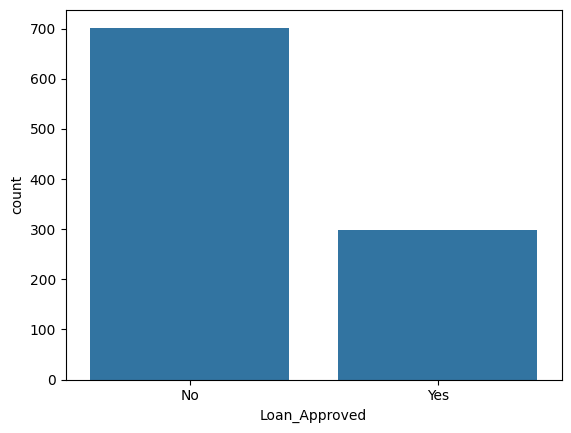

In [8]:
# Check distribution of Loan_Approved
df['Loan_Approved'].value_counts()

# Visualize
sns.countplot(data=df, x='Loan_Approved')
plt.show()


In [9]:
# Encode categorical features
le = LabelEncoder()
for col in categorical_cols:
    if col != 'Loan_Approved':  # skip target
        df[col] = le.fit_transform(df[col])

# Encode target
df['Loan_Approved'] = df['Loan_Approved'].map({'Yes':1, 'No':0})

df.head()


,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,1,51.0,0,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,4,2,1,0,3,0
1,2.0,2860.0,2679.0,1,46.0,0,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,1,1,0,1,3,0
2,3.0,7390.0,2106.0,1,25.0,1,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,0,2,0,0,1,1
3,4.0,13964.0,8173.0,1,40.0,0,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,0,0,0,0,1,0
4,5.0,13284.0,4223.0,2,31.0,1,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,1,2,0,1,3,1


In [10]:
# Features & target
X = df.drop('Loan_Approved', axis=1)
y = df['Loan_Approved']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (800, 19)
Test set: (200, 19)


In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [13]:
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.915

Confusion Matrix:
 [[128  11]
 [  6  55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94       139
           1       0.83      0.90      0.87        61

    accuracy                           0.92       200
   macro avg       0.89      0.91      0.90       200
weighted avg       0.92      0.92      0.92       200



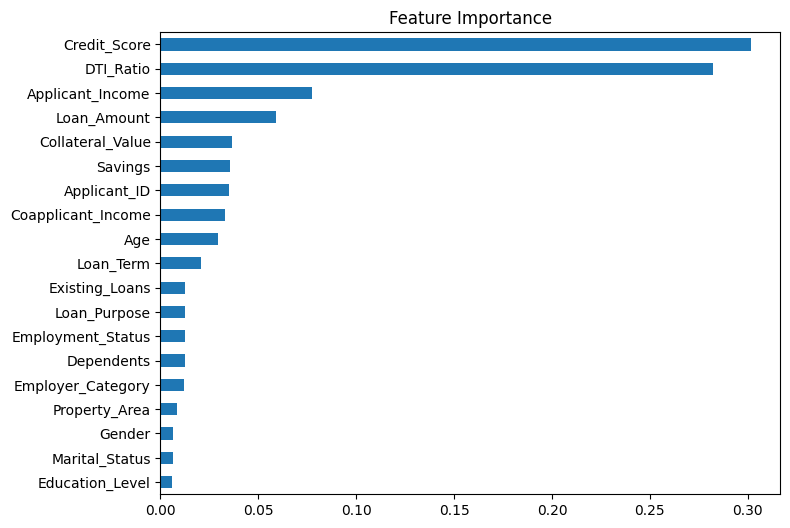

In [14]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance")
plt.show()


In [17]:
# Example new applicant
new_applicant = {
    'Applicant_Income': [12000],
    'Coapplicant_Income': [2000],
    'Employment_Status': [1],
    'Age': [35],
    'Marital_Status': [0],
    'Dependents': [1],
    'Credit_Score': [650],
    'Existing_Loans': [2],
    'DTI_Ratio': [0.3],
    'Savings': [10000],
    'Collateral_Value': [20000],
    'Loan_Amount': [15000],
    'Loan_Term': [60],
    'Loan_Purpose': [1],
    'Property_Area': [2],
    'Education_Level': [1],
    'Gender': [0],
    'Employer_Category': [1]
}

new_df = pd.DataFrame(new_applicant)

# Reorder columns to match training data
new_df = new_df[X_train.columns]

# Scale features
new_scaled = scaler.transform(new_df)

# Predict
prediction = model.predict(new_scaled)
print("Loan Approved ✅" if prediction[0]==1 else "Loan Not Approved ❌")


KeyError: "['Applicant_ID'] not in index"

In [18]:
# Columns in training data
print("Training columns:", list(X_train.columns))

# Columns in new applicant
print("New applicant columns:", list(new_df.columns))


Training columns: ['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income', 'Employment_Status', 'Age', 'Marital_Status', 'Dependents', 'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings', 'Collateral_Value', 'Loan_Amount', 'Loan_Term', 'Loan_Purpose', 'Property_Area', 'Education_Level', 'Gender', 'Employer_Category']
New applicant columns: ['Applicant_Income', 'Coapplicant_Income', 'Employment_Status', 'Age', 'Marital_Status', 'Dependents', 'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings', 'Collateral_Value', 'Loan_Amount', 'Loan_Term', 'Loan_Purpose', 'Property_Area', 'Education_Level', 'Gender', 'Employer_Category']


In [19]:
# Add missing columns with default 0
for col in X_train.columns:
    if col not in new_df.columns:
        new_df[col] = 0

# Reorder columns to match training data
new_df = new_df[X_train.columns]


In [20]:
# Scale using the trained scaler
new_scaled = scaler.transform(new_df)

# Predict
prediction = model.predict(new_scaled)
print("Loan Approved ✅" if prediction[0]==1 else "Loan Not Approved ❌")


Loan Not Approved ❌


In [21]:
def predict_new_applicant(input_dict):
    new_df = pd.DataFrame([input_dict])
    # Add missing columns
    for col in X_train.columns:
        if col not in new_df.columns:
            new_df[col] = 0
    # Reorder
    new_df = new_df[X_train.columns]
    # Scale
    new_scaled = scaler.transform(new_df)
    # Predict
    return "Loan Approved ✅" if model.predict(new_scaled)[0]==1 else "Loan Not Approved ❌"


In [22]:
predict_new_applicant(new_applicant)


ValueError: setting an array element with a sequence.

In [23]:
new_applicant = {
    'Applicant_Income': 12000,
    'Coapplicant_Income': 2000,
    'Employment_Status': 1,
    'Age': 35,
    'Marital_Status': 0,
    'Dependents': 1,
    'Credit_Score': 650,
    'Existing_Loans': 2,
    'DTI_Ratio': 0.3,
    'Savings': 10000,
    'Collateral_Value': 20000,
    'Loan_Amount': 15000,
    'Loan_Term': 60,
    'Loan_Purpose': 1,
    'Property_Area': 2,
    'Education_Level': 1,
    'Gender': 0,
    'Employer_Category': 1
}


In [24]:
def predict_new_applicant(input_dict):
    # Convert to DataFrame
    new_df = pd.DataFrame([input_dict])  # wrap dict in a list
    
    # Add missing columns with default 0
    for col in X_train.columns:
        if col not in new_df.columns:
            new_df[col] = 0

    # Reorder columns to match training data
    new_df = new_df[X_train.columns]

    # Scale
    new_scaled = scaler.transform(new_df)

    # Predict
    return "Loan Approved ✅" if model.predict(new_scaled)[0]==1 else "Loan Not Approved ❌"


In [25]:
predict_new_applicant(new_applicant)


'Loan Not Approved ❌'

In [26]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [27]:
import pickle
import os

# Create models folder if it doesn't exist
if not os.path.exists('../models'):
    os.makedirs('../models')

# Save trained Random Forest model
with open('../models/loan_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Save the scaler used for feature scaling
with open('../models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Model and scaler saved successfully in the 'models/' folder!")


Model and scaler saved successfully in the 'models/' folder!


In [28]:
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.915


In [29]:
import pickle

# Save feature order
feature_order = X_train.columns.tolist()
with open('../models/features.pkl', 'wb') as f:
    pickle.dump(feature_order, f)
